## Module 8 - Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

Here we have a dataset that describes the actions of potential ad buyers on a social media site. Using this data, can we build a model to predict whether or not a user will purchase an ad?

In [3]:
ad_data = pd.read_csv("Social_Network_Ads.csv")
ad_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Can we use multiple linear regression to build this model? Linear regression requires the residuals to be normally distributed, that unfortunately will not be the case here. Instead of a General Linear Model (like linear regression), we use a Generalied Linear Model. Basically, we need a function to map the space of $(-\infty, \infty)$ to $(0,1)$. For that we use the Logit function:
$$Logit(p) = log\bigg(\frac{p}{1-p}\bigg)$$

C:\install\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in log



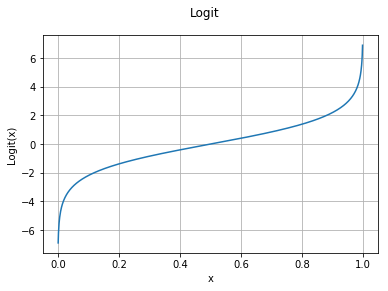

In [4]:
def logit(p):
    return np.log(p / (1 - p))

x = np.arange(0, 1, 0.001)
logit_vals = logit(x)

fig, ax = plt.subplots()
ax.plot(x, logit_vals)
ax.grid(True)
ax.set_xlabel("x")
ax.set_ylabel("Logit(x)")
fig.suptitle("Logit")

plt.show()

As written, this function maps our data from $(0,1)$ to $(-\infty, \infty)$. We actually want the opposite, so we reverse the equation:
$$f(x) = \frac{1}{1+e^{-x}} = \frac{e^{x}}{e^{x} + 1}$$
This is known as the sigmoid function. We can use it to see the relationship between the probability (p) and the logit function.

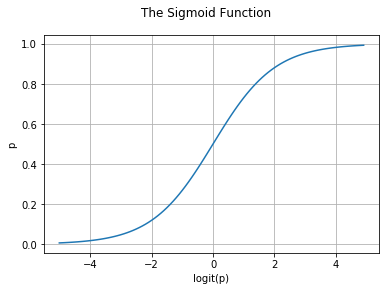

In [5]:
def sigmoid(z):
    return np.exp(z) / (np.exp(z) + 1)

x = np.arange(-5., 5., 0.1)
sig = sigmoid(x)

fig,ax = plt.subplots()
ax.plot(x,sig)
ax.grid(True)
ax.set_xlabel("logit(p)")
ax.set_ylabel("p")
fig.suptitle("The Sigmoid Function")

plt.show()

We can use this in the same way that we used our multiple regression equation:
$$logit(p_{i}) = log\bigg(\frac{p_{i}}{1-p_{i}}\bigg) = \beta_{0} + \beta_{1}x_{1} + \beta_{1}x_{1} + ... + \beta_{k}x_{k}$$

We can use this equation to solve for $p_{i}$, when we do this is the equation:
$$p_{i} = \frac{e^{(\beta_{0} + \beta_{1} \cdot x_{1} + ... + \beta_{n} \cdot x_{n}) }}{1 + e^{(\beta_{0} + \beta_{1} \cdot x_{1} + ... + \beta_{n} \cdot x_{n}) }}$$

This equation is applied in logistic regression, a machine learning algorithm used for binary predictions. Here we apply this equation to solve the question above.

In [6]:
X = ad_data[["Gender", "Age", "EstimatedSalary"]]
X["Gender"] = pd.get_dummies(X["Gender"])["Female"]
Y = ad_data["Purchased"]

# Splitting the dataset into the Training set and Test set
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Feature Scaling - This is not necessary, but it is highly recommended.
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

# Fitting the Logistic Regression into the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_Train, Y_Train)

print(classifier.intercept_)
print(classifier.coef_)

[-0.93245089]
[[-0.09186917  2.07997332  1.11053785]]


C:\install\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\install\anaconda3\envs\datascience\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning:

Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.

C:\install\anaconda3\envs\datascience\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.

C:\install\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning:

Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.

C:\install\anaconda3\envs\datascience\lib\site-packages\sklearn\linea

Now that we have the predictions, we can begin evaluating our classifier. We'll begin by looking at the values we can determine from the confusion matrix

In [7]:
Y_Probs = classifier.predict_proba(X_Test)
Y_Pred = classifier.predict(X_Test)

pred_df = pd.DataFrame({"Probabilities": Y_Probs[:,1], "Y_Predictions": Y_Pred, "Y_Values": Y_Test})
pred_df

,Probabilities,Y_Predictions,Y_Values
132,0.124345,0,0
309,0.157210,0,0
341,0.212761,0,0
196,0.083687,0,0
246,0.091364,0,0
60,0.008774,0,0
155,0.014092,0,0
261,0.753855,1,1
141,0.005382,0,0
214,0.533229,1,0


In [7]:
TP = sum((pred_df["Y_Predictions"] == 1) & (pred_df["Y_Values"] == 1))
FP = sum((pred_df["Y_Predictions"] == 1) & (pred_df["Y_Values"] == 0))
TN = sum((pred_df["Y_Predictions"] == 0) & (pred_df["Y_Values"] == 0))
FN = sum((pred_df["Y_Predictions"] == 0) & (pred_df["Y_Values"] == 1))
accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("%s True Positivies" % TP)
print("%s False Positivies" % FP)
print("%s True Negatives" % TN)
print("%s False Negatives" % FN)
print("Accuracy is: %.2f" % accuracy)
print("Precision is: %.2f" % precision)
print("Sensitivity is: %.2f" % sensitivity)
print("Specificity is: %.2f" % specificity)

26 True Positivies
3 False Positivies
65 True Negatives
6 False Negatives
Accuracy is: 0.91
Precision is: 0.90
Sensitivity is: 0.81
Specificity is: 0.96


By default, the cutoff used to go from a probability to a prediction is 0.5, but this is not necessarily optimal. How do our results change if we alter the cutoff?

In [8]:
pred_df["Y_Predictions_2"] = (pred_df["Probabilities"] >= 0.3).astype(int)

In [9]:
TP = sum((pred_df["Y_Predictions_2"] == 1) & (pred_df["Y_Values"] == 1))
FP = sum((pred_df["Y_Predictions_2"] == 1) & (pred_df["Y_Values"] == 0))
TN = sum((pred_df["Y_Predictions_2"] == 0) & (pred_df["Y_Values"] == 0))
FN = sum((pred_df["Y_Predictions_2"] == 0) & (pred_df["Y_Values"] == 1))
accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("%s True Positivies" % TP)
print("%s False Positivies" % FP)
print("%s True Negatives" % TN)
print("%s False Negatives" % FN)
print("Accuracy is: %.2f" % accuracy)
print("Precision is: %.2f" % precision)
print("Sensitivity is: %.2f" % sensitivity)
print("Specificity is: %.2f" % specificity)

30 True Positivies
12 False Positivies
56 True Negatives
2 False Negatives
Accuracy is: 0.86
Precision is: 0.71
Sensitivity is: 0.94
Specificity is: 0.82


In determining where to place the cutoff, it can often be useful to look at the data.

In [10]:
group_0 = pred_df[pred_df["Y_Values"] == 0]["Probabilities"]
group_1 = pred_df[pred_df["Y_Values"] == 1]["Probabilities"]

trace1 = go.Histogram(
    x=group_0,
    opacity=0.75,
    name="Didn't Purchase",
    histnorm="probability"
)
trace2 = go.Histogram(
    x=group_1,
    opacity=0.75,
    name="Purchased",
    histnorm="probability"    
)
data = [trace1, trace2]

layout = go.Layout(
    barmode='overlay',
    xaxis=dict(title="Prediction Confidence"),
    yaxis=dict(title="Frequency")
)
fig = go.Figure(data=data, layout=layout)

iplot(fig)

We can also generate evaluation criteria that tell us how well our classifier worked. First we'll make a Receiver Operating Characteristic (ROC) curve.

In [11]:
# Use sklearn to get us the tpr and fpr at different cutoffs
tpr, fpr, _ = metrics.roc_curve(pred_df["Y_Values"], pred_df["Probabilities"])

trace0 = go.Scatter(
    x = tpr,
    y = fpr,
    mode = 'lines',
    name = 'Predictor'
)

trace1 = go.Scatter(
    x = tpr,
    y = tpr,
    mode='lines',
    name='Random',
    line=dict(
        dash="dash",
        color="grey")
)

data = [trace0, trace1]

layout = dict(title = 'ROC Curve for Ad Purchases',
              xaxis = dict(title = 'False Positive Rate'),
              yaxis = dict(title = 'True Positive Rate'),
              )

fig = dict(data=data, layout=layout)
iplot(fig)
auc = metrics.roc_auc_score(pred_df["Y_Values"], pred_df["Probabilities"])
print("Area Under the ROC Curve (AUC) is %.2f" % auc)

Area Under the ROC Curve (AUC) is 0.95


Next up is a precision-recall plot

In [12]:
# Use sklearn to get us the tpr and fpr at different cutoffs
precision, recall, _ = metrics.precision_recall_curve(pred_df["Y_Values"], pred_df["Probabilities"])

trace0 = go.Scatter(
    x = recall,
    y = precision,
    mode = 'lines',
    name = 'Predictor'
)

data = [trace0]

layout = dict(title = 'Precision-Recall Curve for Ad Purchases',
              xaxis = dict(title = 'Recall'),
              yaxis = dict(title = 'Precision'),
              )

fig = dict(data=data, layout=layout)
iplot(fig)